**Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

**1. Read the dataset to the python environment**

In [2]:
data = pd.read_csv("/content/Wholesale customers data.csv")

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


<Axes: xlabel='Grocery', ylabel='Delicassen'>

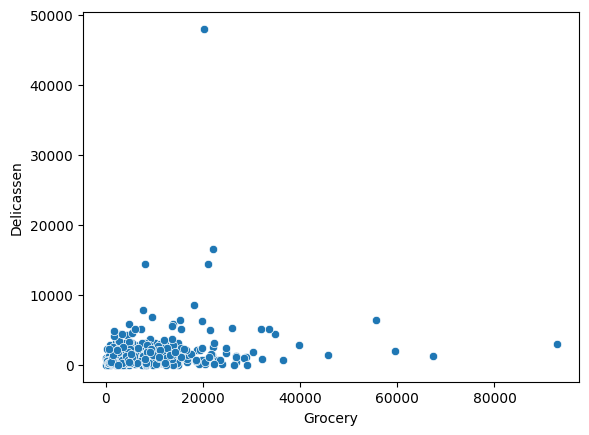

In [6]:
import seaborn as sns
sns.scatterplot(x=data['Grocery'], y=data['Delicassen'])

<Axes: xlabel='Detergents_Paper', ylabel='Milk'>

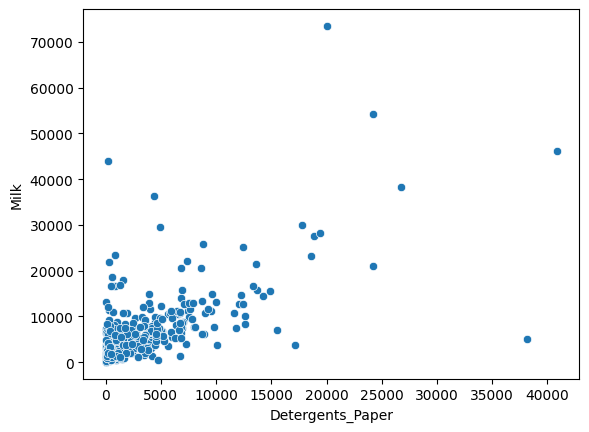

In [7]:
import seaborn as sns
sns.scatterplot(x=data['Detergents_Paper'], y=data['Milk'])

**2. Try out different clustering models in the Whole sale customer dataset**

**Data Preprocessing**

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

**3. Also perform PCA for Dimensionality reduction**

**PCA for Dimensionality Reduction**

In [9]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.38750123 0.22374588]


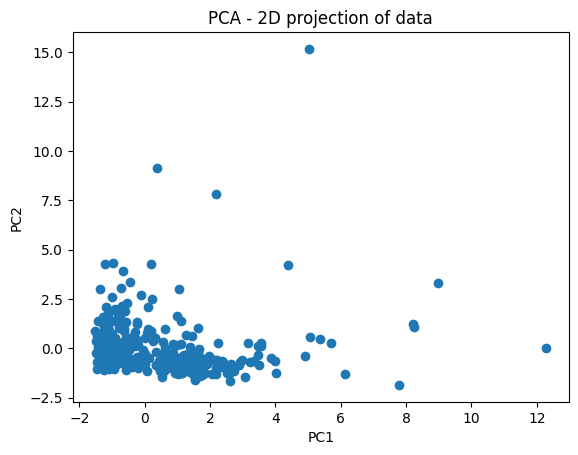

In [10]:
plt.scatter(pca_data[:,0], pca_data[:,1])
plt.title("PCA - 2D projection of data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [11]:
wcss = []
k_values = range(2, 11)
for i in k_values:
    kmeans = KMeans(n_clusters=i,init ='k-means++', random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

In [12]:
kmeans.inertia_

190.92274188940786

In [13]:
kmeans.labels_

array([0, 0, 9, 1, 9, 0, 0, 0, 4, 8, 0, 4, 9, 0, 0, 4, 0, 1, 9, 4, 9, 4,
       6, 5, 9, 0, 4, 4, 5, 1, 9, 4, 4, 1, 4, 0, 1, 0, 8, 6, 6, 1, 0, 8,
       0, 5, 8, 2, 0, 5, 4, 4, 9, 0, 1, 4, 5, 0, 4, 4, 0, 2, 0, 8, 4, 5,
       4, 0, 1, 4, 1, 6, 1, 9, 0, 1, 4, 8, 4, 4, 4, 8, 0, 1, 0, 2, 2, 6,
       1, 1, 4, 1, 5, 6, 0, 4, 0, 4, 4, 4, 0, 8, 0, 6, 4, 4, 0, 8, 0, 8,
       4, 8, 1, 1, 1, 4, 4, 4, 1, 4, 4, 4, 4, 0, 1, 6, 1, 9, 4, 1, 1, 4,
       4, 4, 4, 4, 9, 4, 1, 4, 1, 1, 1, 1, 4, 5, 4, 4, 4, 1, 4, 4, 4, 4,
       4, 8, 0, 4, 0, 8, 0, 4, 4, 8, 0, 8, 0, 4, 4, 4, 0, 5, 4, 8, 4, 0,
       6, 1, 4, 4, 9, 3, 0, 7, 4, 4, 4, 9, 0, 0, 1, 4, 4, 0, 4, 1, 6, 0,
       4, 4, 8, 8, 6, 4, 4, 8, 4, 0, 4, 8, 1, 5, 4, 4, 0, 0, 5, 4, 0, 4,
       4, 0, 4, 4, 4, 4, 9, 4, 4, 1, 9, 4, 4, 4, 1, 4, 4, 1, 4, 1, 1, 1,
       4, 4, 9, 8, 4, 4, 4, 4, 4, 5, 1, 9, 9, 1, 4, 4, 6, 1, 4, 4, 4, 4,
       0, 9, 8, 1, 8, 4, 4, 4, 4, 1, 4, 4, 1, 1, 1, 0, 4, 0, 6, 1, 6, 1,
       4, 1, 4, 1, 4, 4, 4, 0, 1, 0, 1, 0, 0, 4, 0,

In [14]:
k_values

range(2, 11)

In [15]:
wcss

[1279.2686845510625,
 889.7117585983343,
 670.9608133299853,
 421.3471867705631,
 343.83770349084847,
 292.40205075503053,
 253.83084866137267,
 211.78613531007971,
 190.92274188940786]

** 4.Find the optimum number of clusters in each model and create the model with the optimum number of clusters **

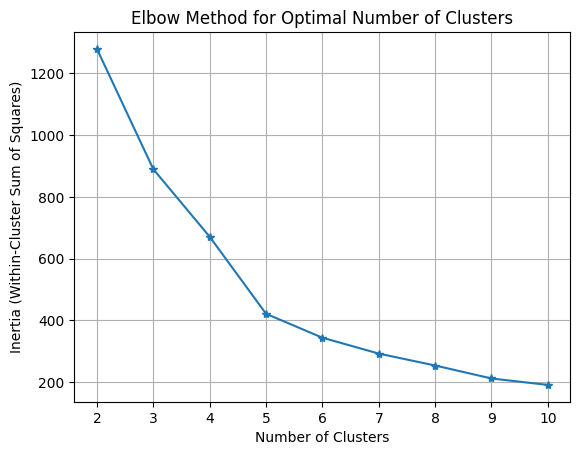

In [16]:
# Plot the Elbow curve
plt.plot(k_values, wcss,marker="*")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

From the plot it's evident that the optimum number of clusters is 5

In [17]:

kmeans = KMeans(n_clusters=5,init ='k-means++',  random_state=42)
kmeans_labels = kmeans.fit_predict(pca_data)
data['KMeans_Cluster'] = kmeans_labels

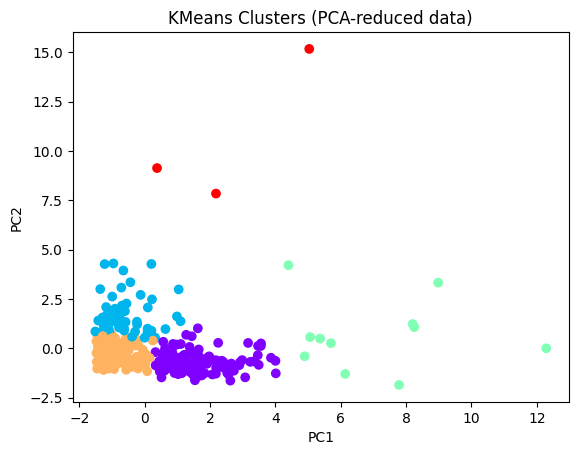

In [18]:
plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans_labels, cmap='rainbow')
plt.title("KMeans Clusters (PCA-reduced data)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [19]:
kmeans_score = silhouette_score(pca_data, kmeans_labels)
print("Silhouette Score for KMeans:", kmeans_score)

Silhouette Score for KMeans: 0.5319846604695937


**Hierarchical Clustering**

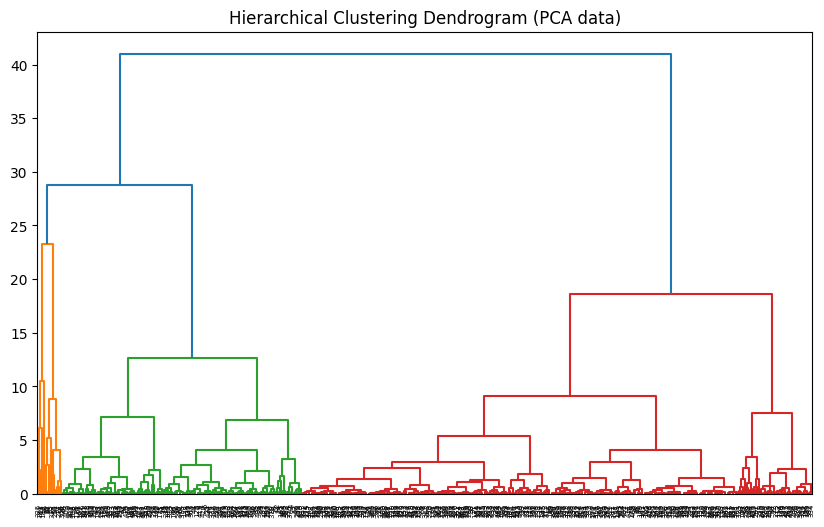

In [20]:
linked = linkage(pca_data, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram (PCA data)")
plt.show()

From the dendrogram, it's evident that the optimum number of clusters is 4

In [21]:
hier = AgglomerativeClustering(n_clusters=4, linkage = 'ward')
hier_labels = hier.fit_predict(pca_data)
data['Hier_Cluster'] = hier_labels

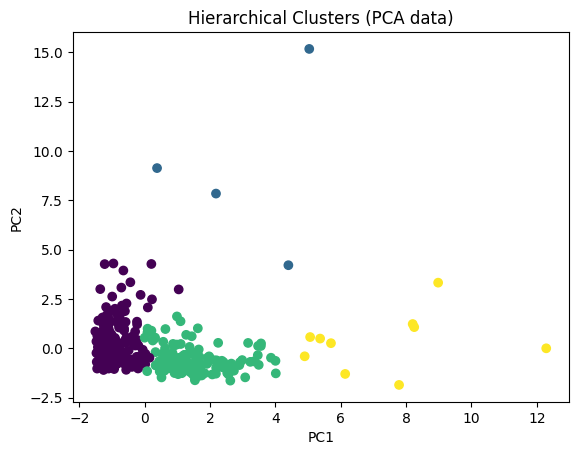

In [22]:
plt.scatter(pca_data[:,0], pca_data[:,1], c=hier_labels, cmap='viridis')
plt.title("Hierarchical Clusters (PCA data)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [23]:
hier_score = silhouette_score(pca_data, hier_labels)
print("Silhouette Score for Hierarchical:", hier_score)

Silhouette Score for Hierarchical: 0.5484334020094447


**5. Perform DBSCAN Clustering**

**DBSCAN Clustering**

In [24]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_data)
data['DBSCAN_Cluster'] = dbscan_labels
print(data['DBSCAN_Cluster'].value_counts())  # shows number of points in each cluster

DBSCAN_Cluster
 0    421
-1     19
Name: count, dtype: int64


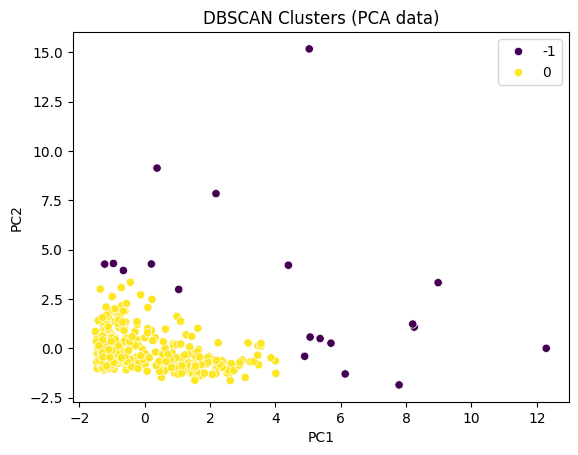

In [25]:
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=dbscan_labels, palette='viridis')
plt.title("DBSCAN Clusters (PCA data)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [26]:
score = silhouette_score(pca_data, dbscan_labels)
print("Silhouette Score:", score)

Silhouette Score: 0.7101399125989226


In [27]:
# Print number of clusters and noise points
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

Number of clusters: 1
Number of noise points: 19


In [28]:
if len(set(dbscan_labels)) > 1 and -1 not in set(dbscan_labels):
    dbscan_score = silhouette_score(pca_data, dbscan_labels)
    print("Silhouette Score for DBSCAN:", dbscan_score)
else:
    print("Silhouette Score for DBSCAN: Not valid (clusters may include noise or only one cluster)")

Silhouette Score for DBSCAN: Not valid (clusters may include noise or only one cluster)


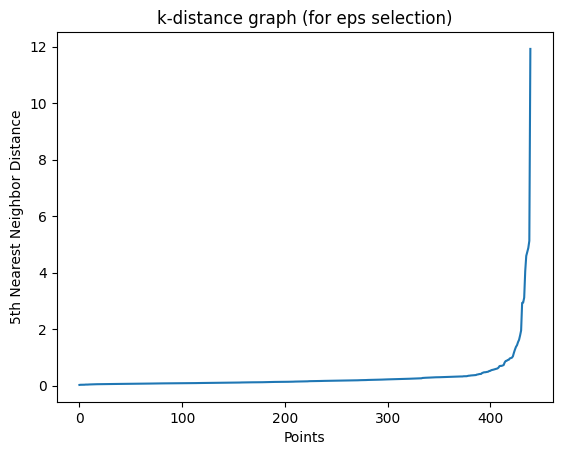

In [29]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# k = min_samples
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(pca_data)
distances, indices = neighbors_fit.kneighbors(pca_data)

# Sort distances
distances = np.sort(distances[:,4])  # 4 = 5th neighbor (index starts at 0)
plt.plot(distances)
plt.title("k-distance graph (for eps selection)")
plt.xlabel("Points")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()


From the plot the elbow appears around eps 1.5-2

In [30]:
dbscan = DBSCAN(eps=1.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_data)
data['DBSCAN_Cluster'] = dbscan_labels

# Check clusters formed
print("DBSCAN Clusters:", np.unique(dbscan_labels))

# Silhouette Score (ignoring noise)
mask = dbscan_labels != -1
if len(set(dbscan_labels[mask])) > 1:
    dbscan_score = silhouette_score(pca_data[mask], dbscan_labels[mask])
    print("Silhouette Score (ignoring noise):", dbscan_score)
else:
    print("Not enough clusters for silhouette score after removing noise")


DBSCAN Clusters: [-1  0]
Not enough clusters for silhouette score after removing noise
